In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
from spafe.features.gfcc import gfcc

In [15]:
file_one = 'data/izbanka.wav'
file_two = 'data/prom.wav'


samplerate1, data1 = wavfile.read(file_one)
samplerate2, data2 = wavfile.read(file_two)
print('Sampling Rate:', samplerate1, '; Audio Shape:', np.shape(data1))
print('Sampling Rate:', samplerate2, '; Audio Shape:', np.shape(data2))

Sampling Rate: 11025 ; Audio Shape: (90352,)
Sampling Rate: 48000 ; Audio Shape: (251136, 2)


In [35]:
sd.play(data1, samplerate1)
sd.wait()

In [36]:
sd.play(data2, samplerate2)
sd.wait()

In [27]:

time1 = np.linspace(0, len(data1) / samplerate1, len(data1))
time2 = np.linspace(0, len(data2) / samplerate2, len(data2))

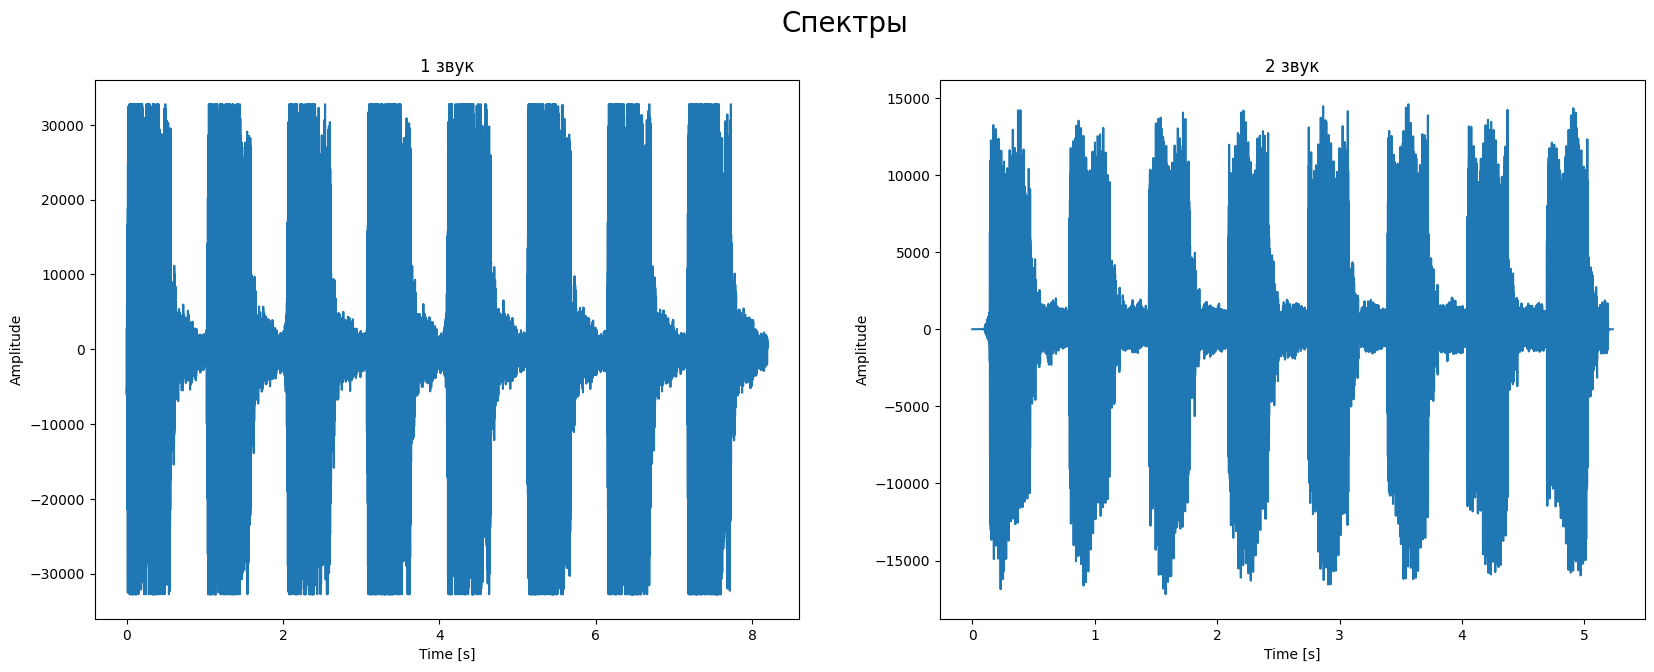

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

axs[0].plot(time1, data1)
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('1 звук')

axs[1].plot(time2, data2)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('2 звук')

plt.suptitle('Спектры', size=20)
plt.show()

In [30]:
samples1, sample_rate1 = librosa.load(file_one)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(file_two)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

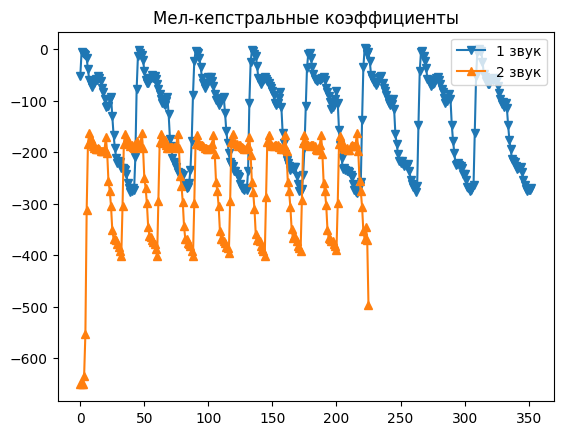

In [32]:
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]

plt.plot(t1, s1.reshape(len(s1), 1), marker='v')
plt.plot(t2, s2.reshape(len(s2), 1), marker='^')
plt.legend(["1 звук", "2 звук"], loc ="upper right") 
plt.title('Мел-кепстральные коэффициенты')
plt.show()

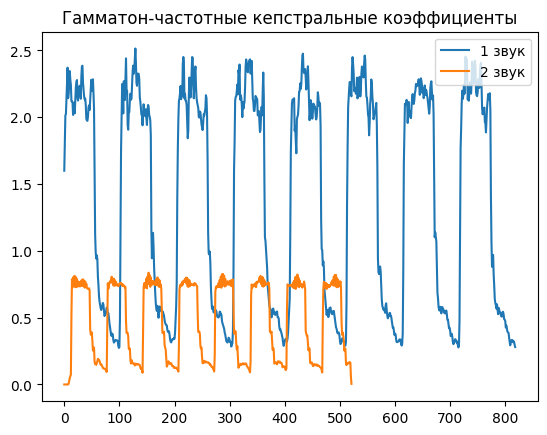

In [33]:
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)

plt.plot(gfccs1)
plt.plot(gfccs2)
plt.legend(["1 звук", "2 звук"], loc ="upper right") 
plt.title('Гамматон-частотные кепстральные коэффициенты')
plt.show()

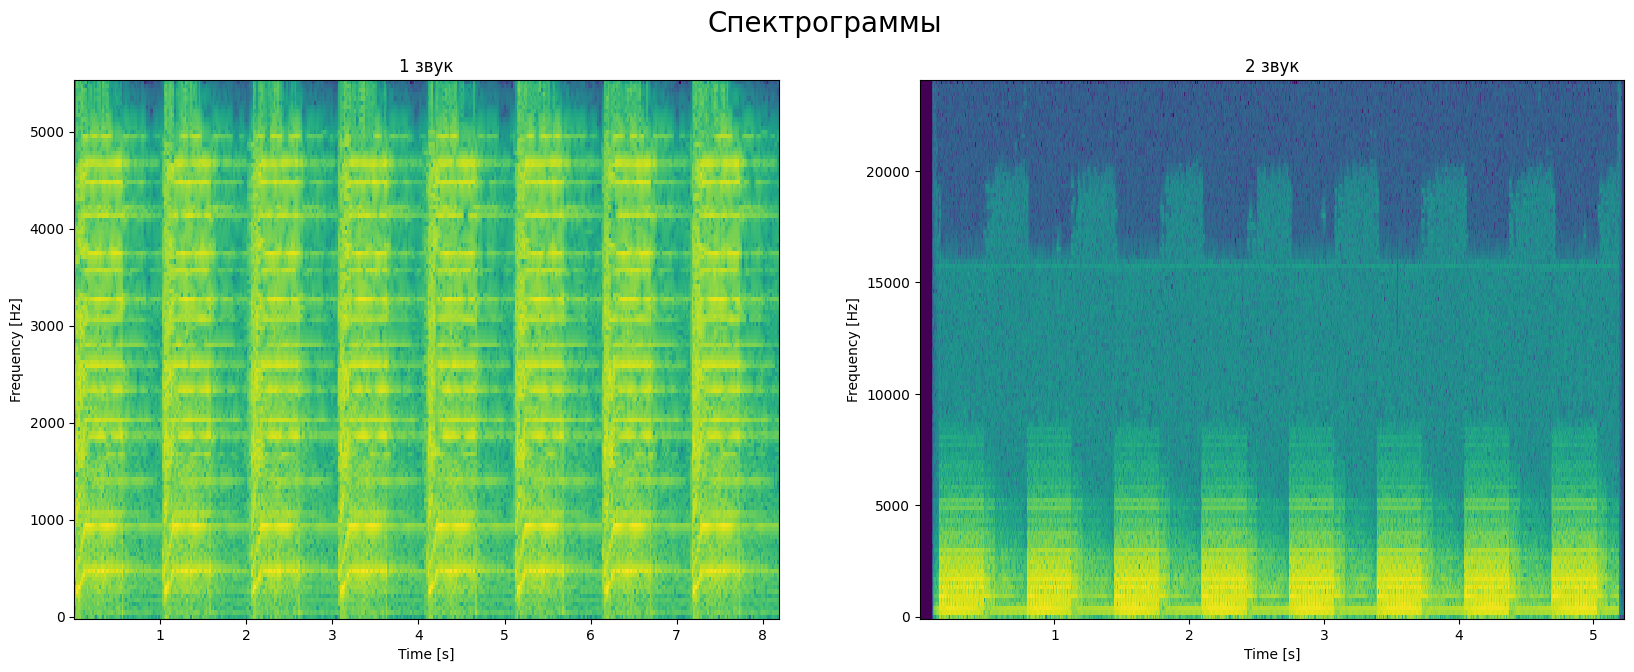

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

fr1, tm1, spgram1 = signal.spectrogram(data1, samplerate1)
fr2, tm2, spgram2 = signal.spectrogram(data2, samplerate2)

lspg1 = np.log(spgram1)
lspg2 = np.log(spgram2+ 1e-10)

axs[0].pcolormesh(tm1, fr1, lspg1, shading='auto')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_title('1 звук')

axs[1].pcolormesh(tm2, fr2, lspg2, shading='auto')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_title('2 звук')

plt.suptitle('Спектрограммы', size=20)
plt.show()

In [40]:
"""
Звуки сильно отличаются(различные типы звуков сигнализаций).Это отлично прослеживается на всех графиках.
К тому же звуки имеют собственную переодичность.
"""

'\nЗвуки сильно отличаются(различные типы звуков сигнализаций).Это отлично прослеживается на всех графиках.\nК тому же звуки имеют постоянную переодичность.\n'